In [1]:
%matplotlib inline
import os
import pdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from util import create_ylabel

In [22]:
rootpth = '.../xdc_runs/'
dat_type = 'test' # 'train', test'
save_fig = True
n_cls_true = 5
n_cls_range = [2, 11]
measure = 'acc' # 'vscore', 'acc'
subfolders = ['fingerflex_cluster_sep_clust#_run1',
              'fingerflex_cluster_xdc_clust#_run1']

row_labels = ['ECoG', 'Dataglove']
sbjs_all = ['S01', 'S02', 'S03', 'S04', 'S05',
            'S07', 'S08', 'S09']


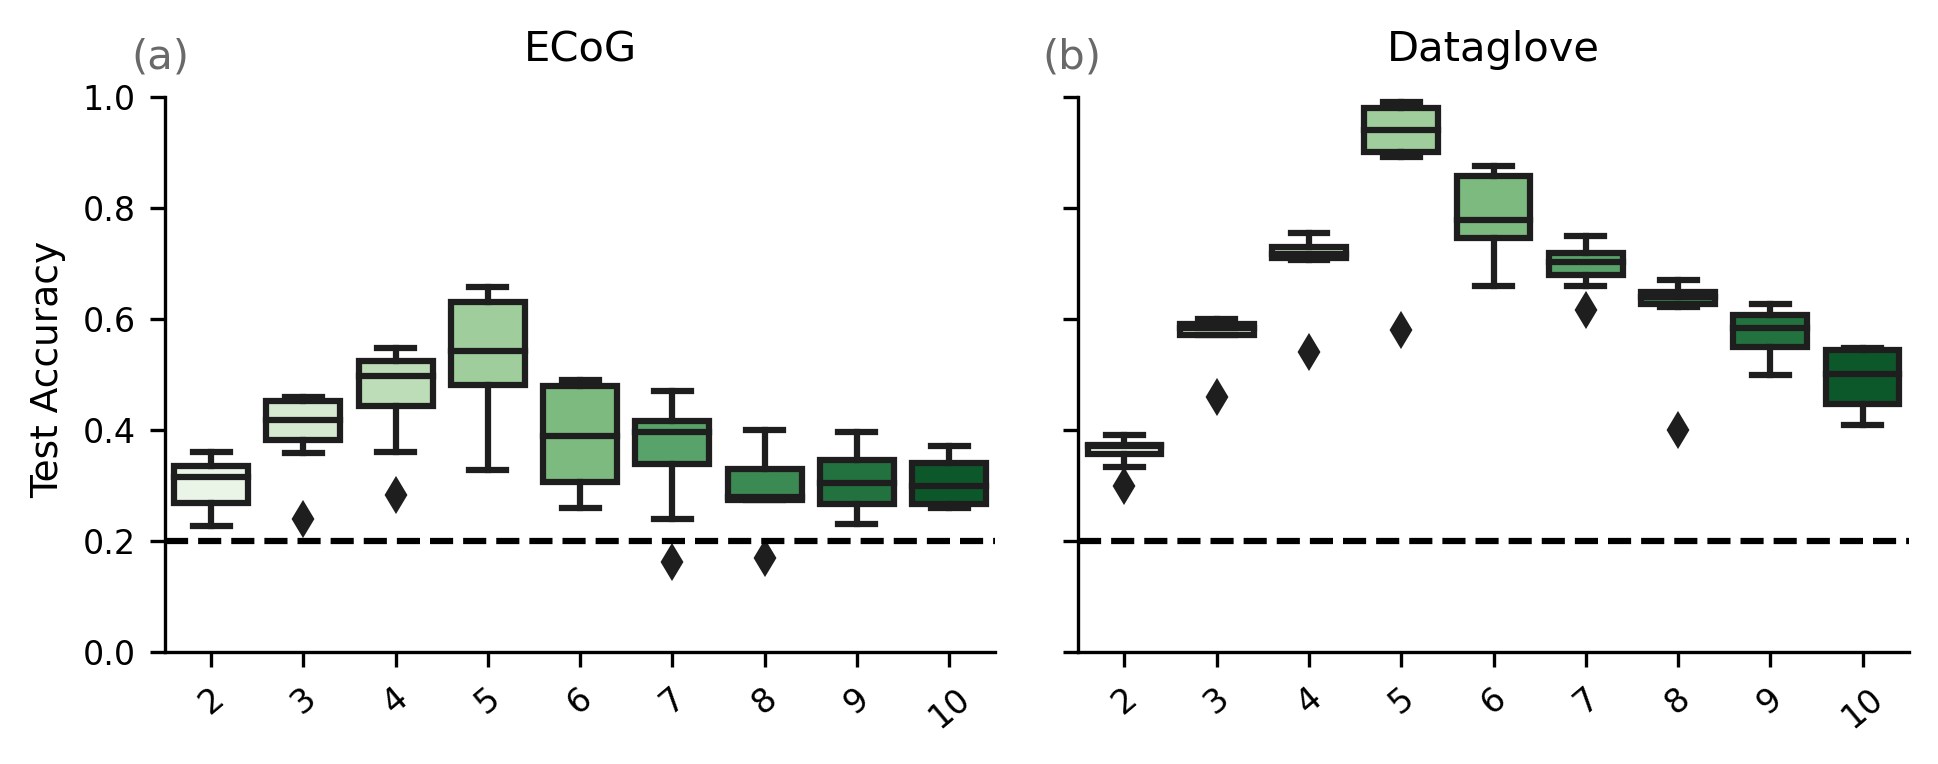

In [23]:
dat_type_d = {'train': 'Train ', 'test': 'Test '}
meas_l = create_ylabel(measure, dat_type_d[dat_type])

pal = sns.color_palette("Greens", n_colors=9)
fold = subfolders[1]

n_cls = [val for val in range(n_cls_range[0],
                              n_cls_range[1])]
group_labels = [str(val) for val in n_cls]
dat_type_d_num = {'train':0, 'test':1}

dat = np.zeros((len(sbjs_all), len(n_cls)*2))
for i, n_cl in enumerate(n_cls):
    dat_fld = []
    fold_use = fold.replace('#',str(n_cl))
    for j, sbj in enumerate(sbjs_all):
        fID = rootpth + fold_use + '/' +sbj + '_' + measure + '.npy'
        if os.path.exists(fID):
            dat_tmp = np.load(fID)[:, dat_type_d_num[dat_type]]
        else:
            dat_tmp = np.zeros((2))
            dat_tmp[:] = np.nan
        dat[j,i*2:(i*2+2)] = dat_tmp
xticks_sbj = ['P'+str(val+1).zfill(2) for val in range(len(sbjs_all))]
df_neur = pd.DataFrame(dat[:,::2], columns = group_labels, index = xticks_sbj)
df_pose = pd.DataFrame(dat[:,1::2], columns = group_labels, index = xticks_sbj)
    
ncols = 2
hspace = 0.5
ylim_lo = 0
yticks = [0, .2, .4, .6, .8, 1]
width = 7.5
fig, ax = plt.subplots(1,ncols,dpi=300,figsize=(width, 2.5),
                       gridspec_kw={'wspace': 0.1, 'hspace': hspace})
palette = sns.color_palette()
sns.boxplot(data=df_neur, ax = ax[0], palette=pal)
if measure == 'acc':
    ax[0].axhline(1/n_cls_true,linestyle='--',color='k')
ax[0].set_yticks(yticks)
ax[0].set_ylim([ylim_lo,1.02]) #1])
ax[0].spines['left'].set_bounds((ylim_lo, 1))
ax[0].set_title(row_labels[0], fontsize=10)
ax[0].set_ylabel(meas_l, fontsize=9)
ax[0].tick_params(axis='both', labelsize=8)
for tick in ax[0].get_xticklabels():
    tick.set_rotation(40)

sns.boxplot(data=df_pose, ax = ax[1], palette=pal)
if measure == 'acc':
    ax[1].axhline(1/n_cls_true,linestyle='--',color='k')
ax[1].set_yticks(yticks)
ax[1].set_ylim([ylim_lo,1.02]) #1])
ax[1].spines['left'].set_bounds((ylim_lo, 1))
ax[1].set_title(row_labels[1], fontsize=10)
ax[1].set_yticklabels([])
ax[1].tick_params(axis='both', labelsize=8)
for tick in ax[1].get_xticklabels():
    tick.set_rotation(40)

for col in range(ncols):
    ax[col].spines['right'].set_visible(False)
    ax[col].spines['top'].set_visible(False)    

lets = ['(a)', '(b)'] if measure == 'acc' else ['(c)', '(d)']
plt.figtext(0.11,0.945, lets[0], ha="left", va="top", fontsize=10, c='dimgray')
plt.figtext(0.515,0.945, lets[1], ha="left", va="top", fontsize=10, c='dimgray')
plt.show()

# Save figure
fig_sp = rootpth+'figs/'
fig_name = 'fingerflex_'+measure
if save_fig:
    fig.savefig(fig_sp+fig_name+'_cluster.eps',
                format='eps',  transparent= True,dpi=300,
                bbox_inches = 'tight', pad_inches = 0.01,
                )